# Name : Sanika Kapoor



### Task 1: Predict the perecentage of the student based on the no. of hours student studied using Simple Linear Regression model which involves two variables.

### Dataset: http://bit.ly/w-data

### Importing the Libraries

In [36]:
# warnings
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
%matplotlib inline


### Understanding the Dataset


In [8]:
# Loading the Dataset
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
df.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [10]:
df.shape

(25, 2)

In [12]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Evaluating Missing Data

In [14]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [16]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

### Visualizing the Dataset


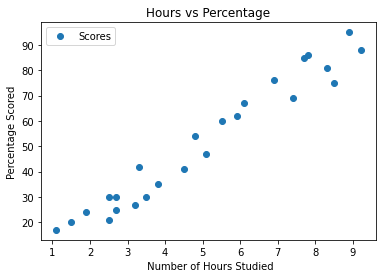

In [19]:
# Plotting distribution of scores to understand the relation between the data.
df.plot(x= 'Hours', y= 'Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel(' Number of Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()



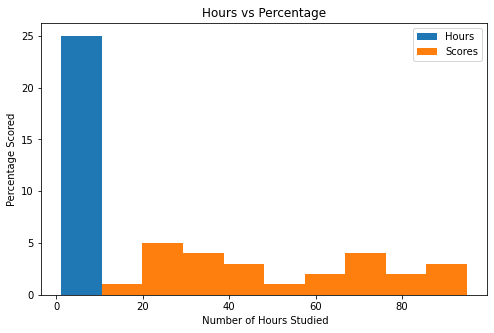

In [20]:
df.plot(kind='hist', figsize=(8,5))
plt.title('Hours vs Percentage')
plt.xlabel(' Number of Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()


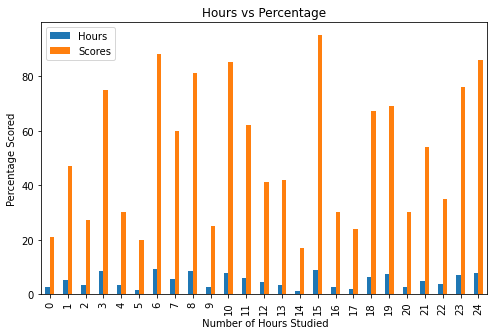

In [21]:
df.plot(kind='bar', figsize=(8,5))
plt.title('Hours vs Percentage')
plt.xlabel(' Number of Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()


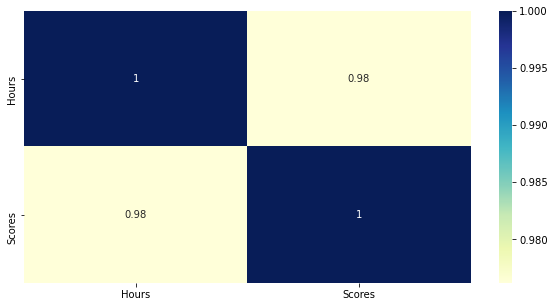

In [23]:
# Checking the correlations
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu",annot_kws={'fontsize':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Data Preparation

In [24]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [25]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [26]:
# Building the linear model and train it
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Training is complete.')

Training is complete.


In [27]:
print("The coefficient is:")
lr.coef_

The coefficient is:


array([9.94167834])

In [28]:
# Getting the best fitted line 
line = lr.intercept_+lr.coef_*X

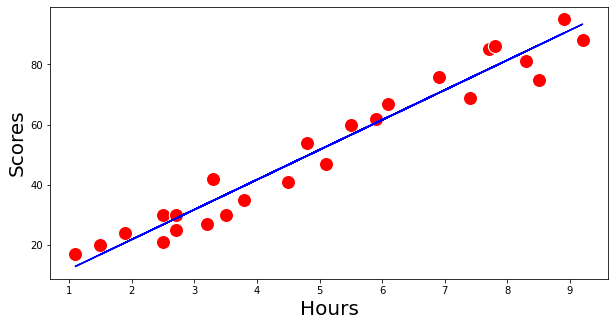

In [29]:
# Plotting the best fitted line on the graph 
plt.figure(figsize=(10,5))
sns.scatterplot(df['Hours'],df['Scores'],s=200,color='r')
plt.plot(df['Hours'],line,'b')
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.show()

### Making Prediction 

In [30]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [31]:
# Comparing Actual vs Predicted values
datafr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
datafr

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [33]:
# Testing the model to redict the percentage of student if he studies for 9.25 hours as given
hours = 9.25
pred = lr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


### Evaluating the Performance of Model

In [34]:

#The final step is to evaluate the performance of the algorithm. 
#This step is particularly important to compare how well different algorithms perform on a particular dataset
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


### Conclusion: We can see the value of the root mean squared error is 4.509 and the mean value of the percentages of all the students is 51.48 (from the statistical details obtained in cell no. 5). Here root mean squared error is less than 10% of the mean value of the percenttages of all the student scores. Hence, it is safe to conclue the model did a decent job to predict the the student score as 93.89 % when student studies for 9.25 hours.